In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read data 

In [2]:
prices=pd.read_csv("data/raw/2020/01/2020-01-01-prices.csv")
stations=pd.read_csv("data/stations.csv")

set range for lattitude

In [7]:
minlat=53.567181
maxlat=53.648408

In [8]:
minlon=9.876232
maxlon=9.941601

In [9]:
#(stations.city=="Hamburg")& - 26 
# wo 51 
stations_on_route=stations.loc[
             (stations.latitude>minlat)&(stations.latitude<maxlat)&
            (stations.longitude>minlon)&(stations.longitude<maxlon)]
   

In [11]:
#len 723
selected_prices = prices.loc[prices.station_uuid.isin(stations_on_route.uuid)]

In [ ]:
#clean no warning version!
#selected_prices.loc[:,'station_name'] = selected_prices['station_uuid'].map(name_dict) 

extend station id to meaningful info

In [13]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict())
selected_prices.loc[:,'station_address']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['street'].to_dict())
selected_prices.loc[:,'station_latitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['latitude'].to_dict())
selected_prices.loc[:,'station_longitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['longitude'].to_dict())



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid

In [ ]:
selected_prices.to_csv("data/processed/2020/01/2020-01-01-prices.csv")

In [200]:
from datetime import datetime

datetime_object = datetime.strptime('2020-01-01 04:02:03+01', '%Y-%m-%d %H:%M:%S+01')
#selected_prices.date
#= pd.to_datetime(selected_prices.date, format='%Y-%m-%d %H:%M:%S+1')
print(datetime_object)

2020-01-01 04:02:03


In [ ]:
def dt_conv(l_d):
    for i in l_d:
        datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S+01')
        print(datetime_object)

In [ ]:
#selected_prices.loc[:,'dt']=
selected_prices.date.applymap(dt_conv)

In [18]:
df=selected_prices.loc[selected_prices.station_uuid=="95b23160-eeb2-440f-adc4-245238f24e42"]
#plot(figsize = (12,6))

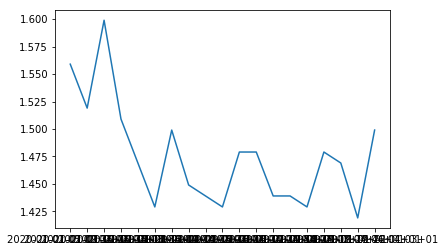

In [487]:

i="95b23160-eeb2-440f-adc4-245238f24e42"    
df = selected_prices.loc[selected_prices.station_uuid==i]
df1 = df.sort_values('date', ascending=True)
plt.plot(df1['date'], df1['e5'],label=df1['station_name'].values[0]+df1['station_address'].values[0])

#plt.xticks(rotation='vertical')
#plt.legend(loc="lower left")

In [67]:
pricesproc=pd.read_csv("data/processed/2020/01/2020-01-01-prices.csv")


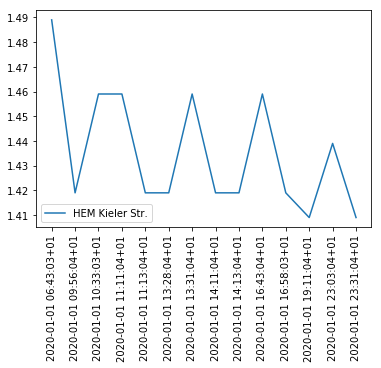

In [91]:
df=pricesproc.loc[pricesproc.station_uuid=="e1a15081-2617-9107-e040-0b0a3dfe563c"]
df1= df.sort_values('date', ascending=True)
plt.plot(df['date'], df['e5'],label=df['station_name'].values[0]+" "+df['station_address'].values[0])
plt.xticks(rotation='vertical')
plt.legend(loc="lower left")

In [104]:
def loop_days(beg, end):
    days_list=[]
    for i in range(beg,end+1):
        if i<10:
            days_list.append("0"+str(i))
        elif i>9 and i<32:
            days_list.append(str(i))
        else:
            print("smth went wrong")
            return 0
    return days_list

In [121]:
data_dir = 'data/processed/2020/01'
merged_data = pd.DataFrame()
spec_id = "e1a15081-2617-9107-e040-0b0a3dfe563c"

for filename in os.listdir(data_dir):
    if "csv" in filename:
        #print(filename)
        dataset=pd.read_csv(os.path.join(data_dir, filename))
        #print("all ",len(dataset))
        dataset_spec=dataset.loc[dataset.station_uuid==spec_id]
        #print("sel ",len(dataset_spec))
        merged_data = merged_data.append(dataset_spec)



In [124]:
merged_data.sort_values('date', ascending=True, inplace=True)

In [483]:
import matplotlib.dates as mdates


def plot_over_time_1(data,gas_type='e5'):
    #years = mdates.YearLocator()   # every year
    #months = mdates.MonthLocator()  # every month
    #ays = mdates.DayLocator()  # every day
    #years_fmt = mdates.DateFormatter('%YYYY')
    #months_fmt = mdates.DateFormatter('%MM')

    df1= data.sort_values('date', ascending=True)
    fig, ax = plt.subplots()
    #ax.plot('date', 'adj_close', data=data)
    label=gas_type+"@"+df1['station_name'].values[0]+" "+df1['station_address'].values[0]
    ax.plot(pd.to_datetime(df1['date']), df1[gas_type])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    

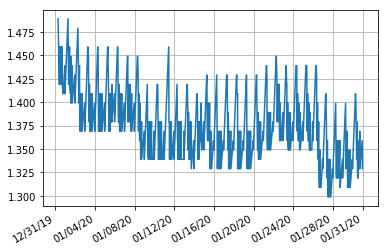

In [484]:
plot_over_time_1(merged_data)

In [134]:
def plot_over_time(data,gas_type='e5'):
    df1= data.sort_values('date', ascending=True)
    plt.plot(df1['date'], df1[gas_type],label=gas_type+"@"+df1['station_name'].values[0]+" "+df1['station_address'].values[0])
    plt.xticks(rotation='vertical')
    plt.legend(loc="lower left")
    

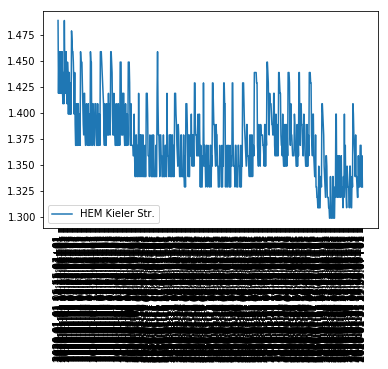

In [129]:
plot_over_time(merged_data)

Find time per day with the cheapest price:
 - 

In [136]:
gas_type='e5'

In [160]:
day1 = merged_data.loc[merged_data.date<'2020-01-02']

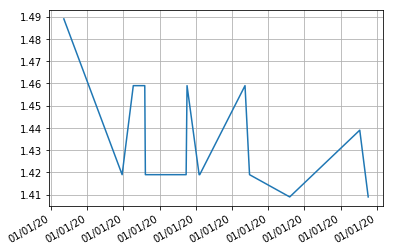

In [488]:
plot_over_time_1(day1)

In [489]:
day1.e5.mean()

1.4354285714285715

In [490]:
day1.e5.max()

1.489

In [491]:
day1.loc[day1.e5change==1].e5.mean()

1.4362727272727276

In [492]:
day1.e5.min()

1.409

In [181]:
day_1=day1.loc[day1.e5change==1]

In [493]:
day_1.date.loc[day_1.e5<=day_1.e5.min()]

262    2020-01-01 19:11:04+01
297    2020-01-01 23:31:04+01
Name: date, dtype: object

In [494]:
day1.date.loc[day1.e5<=day1.e5.min()]

262    2020-01-01 19:11:04+01
297    2020-01-01 23:31:04+01
Name: date, dtype: object

In [495]:
datetime_object = datetime.strptime(day1.date.loc[day1.e5<=day1.e5.min()].values[1], '%Y-%m-%d %H:%M:%S+01')

In [496]:
datetime_object

datetime.datetime(2020, 1, 1, 23, 31, 4)

In [497]:
datetime_object.weekday()

2

In [498]:
today = datetime.strptime("2020-02-02 17:05:01+01", '%Y-%m-%d %H:%M:%S+01')

In [499]:
today.weekday()

6

In [217]:
def extract_hour(time_str):
    datetime_object=datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S+01')
    return datetime_object.time().hour

In [209]:
datetime_object.time().hour

23

In [191]:
print(day_1.date.min(),day_1.date.max())

2020-01-01 06:43:03+01 2020-01-01 23:31:04+01


In [328]:
import calendar

def month_range(mon,year=2020):
    ndays = calendar.monthrange(year,mon)[1]    
    m_range=range(1,ndays+1)
    return m_range

In [337]:
calendar.month_abbr[1]

'Jan'

In [345]:
def get_lowprice_time(df,month=1,year=2020):
    time_lowest_price = []

    for i in month_range(month,year):
        dval = ""
        if i<10:
            dval = "0"+str(i+1)
        elif i>9:
            dval = str(i+1)
            #print(i)
        df0 = df.loc[(df.date>'2020-01-0'+str(i))&(df.date<'2020-01-'+dval)]
        
        #df = df0.loc[df0.e5change==1]
        tmp=""
        for j in df0.date.loc[df0.e5<=df0.e5.min()]:
            if not tmp:
                time_lowest_price.append(extract_hour(j)) 
            elif tmp:
                if extract_hour(tmp)!=extract_hour(j):
                    time_lowest_price.append(extract_hour(j))                
                    #print(j,", ",df0.e5)
            #elif extract_hour(tmp)==extract_hour(j):
                #print("repeat : ",j)
            tmp=j
    #print(", df0 = ",len(df0),"; change ",len(df))
    #time_lowest_price.append(df.date.loc[df.e5<=df.e5.min()])
    t_array = np.asarray(time_lowest_price)
    nbins=t_array.max()-t_array.min()
    plt.hist(t_array, bins=nbins,rwidth=0.9)
    plt.title('Time of the day when the gas price is lowest')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig("Plots/cheapest_hour_m"+calendar.month_abbr[month]+str(year)+".png", transparent=True)
    return t_array

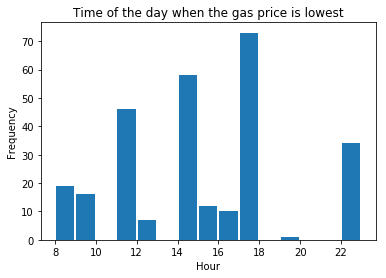

In [335]:
t_array1=get_lowprice_time(merged_data.loc[merged_data.e5change==1])

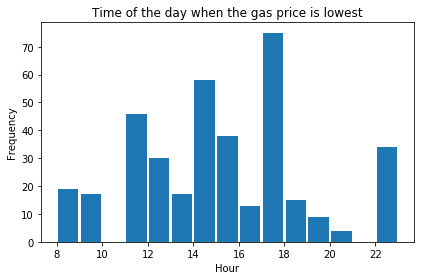

In [346]:
#t_array = np.asarray(time_lowest_price)
t_array=get_lowprice_time(merged_data)